In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
import json

# Convert to .csv and load data

In [2]:
import csv
from xml.dom import minidom

def xml_to_csv(xml_file, csv_file, record_tag):
    # Parse the XML file
    dom_tree = minidom.parse(xml_file)
    collection = dom_tree.documentElement

    # Get all record elements (e.g., <employee>)
    records = collection.getElementsByTagName(record_tag)

    # Extract headers from the first record
    headers = [node.tagName for node in records[0].childNodes if node.nodeType == node.ELEMENT_NODE]

    # Open CSV file for writing
    with open(csv_file, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(headers)

        # Write each record’s data
        for record in records:
            row = []
            for header in headers:
                element = record.getElementsByTagName(header)[0]
                value = element.firstChild.nodeValue if element.firstChild else ''
                row.append(value)
            writer.writerow(row)

    print(f"✅ XML data successfully written to '{csv_file}'")

# Example usage
if __name__ == "__main__":
    xml_to_csv("/Users/huynhphuongchi/Desktop/Unipi/DSS/Module 2/LDS Data 2025-2026/artists.xml", "artists.csv", "row")


✅ XML data successfully written to 'artists.csv'


In [3]:
import pandas as pd

raw_data = pd.read_csv('artists.csv', skipinitialspace=True)

In [4]:
df_cleaned = raw_data.copy()

# General information

In [5]:
raw_data

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,NaN,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,NaN,Verona,Veneto,Italia,45.442498,10.985738
2,ART18853907,alfa,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ART64265460,anna pepe,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ART75741740,articolo 31,M,NaN,NaN,NaN,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,ART98118784,tormento,M,1975-09-06,Reggio Calabria,Italia,"rapper, cantautore e beatmaker italiano (1975-)",NaN,NaN,Reggio Calabria,Calabria,Italia,38.103539,15.639756
100,ART15560128,vacca,M,1979-10-21,Cagliari,Italia,rapper italiano,2001-01-01,NaN,Cagliari,Sardegna,Italia,39.217199,9.113311
101,ART57587384,willie peyote,M,1985-08-28,Torino,Italia,rapper e cantautore italiano (1985-),2004-01-01,NaN,Torino,Piemonte,Italia,45.067755,7.682489
102,ART71515715,yeиdry,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_author     104 non-null    object 
 1   name          104 non-null    object 
 2   gender        104 non-null    object 
 3   birth_date    73 non-null     object 
 4   birth_place   72 non-null     object 
 5   nationality   71 non-null     object 
 6   description   86 non-null     object 
 7   active_start  50 non-null     object 
 8   active_end    0 non-null      float64
 9   province      70 non-null     object 
 10  region        68 non-null     object 
 11  country       70 non-null     object 
 12  latitude      72 non-null     float64
 13  longitude     72 non-null     float64
dtypes: float64(3), object(11)
memory usage: 11.5+ KB


In [7]:
raw_data.select_dtypes(include=['int64','bool','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
active_end,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,72.0,43.591374,2.248674,37.747452,41.577547,45.067755,45.464194,45.806691
longitude,72.0,11.060876,2.591871,7.525403,9.189635,9.917118,12.482932,18.225226


In [8]:
raw_data.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
id_author,104,104,ART82291002,1
name,104,104,99 posse,1
gender,104,2,M,87
birth_date,73,73,1990-07-11,1
birth_place,72,40,Milano,15
nationality,71,2,Italia,70
description,86,69,gruppo musicale italiano,6
active_start,50,24,1996-01-01,6
province,70,26,Milano,19
region,68,13,Lombardia,24


In [9]:
raw_data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_author,104,104,ART82291002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,104,104,99 posse,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,104,2,M,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_date,73,73,1990-07-11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_place,72,40,Milano,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality,71,2,Italia,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,86,69,gruppo musicale italiano,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_start,50,24,1996-01-01,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
active_end,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,70,26,Milano,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
raw_data.country.value_counts()

country
Italia    70
Name: count, dtype: int64

In [11]:
df_cleaned["country"] = df_cleaned["country"].replace("Italia", "Italy")

# Handling missing value

In [12]:
def missing_values(data : pd.DataFrame, threshold : float = 10):

    na_count = data.isna().sum()
    na_exist = na_count[na_count > 0]
    na_abs_frq = na_exist.values
    na_rel_frq = round(na_exist/len(data)*100)
    missings = pd.DataFrame({'Nº of missings': na_abs_frq, '% of missings': na_rel_frq})
    missings = missings.sort_values(by = 'Nº of missings', ascending = False)

    if threshold:
        missings['Above threshold'] = [True if x > threshold else False for x in missings['% of missings']]
    
    return missings

missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_end,104,100.0,True
active_start,54,52.0,True
region,36,35.0,True
province,34,33.0,True
country,34,33.0,True
nationality,33,32.0,True
birth_place,32,31.0,True
latitude,32,31.0,True
longitude,32,31.0,True
birth_date,31,30.0,True


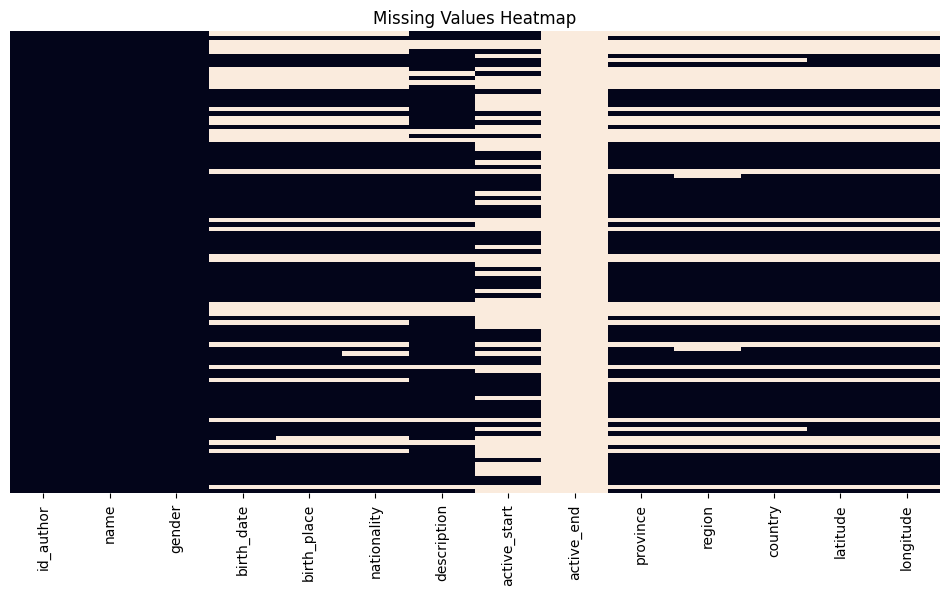

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Discussion

- Drop column "active-end" (100% mjssing) or fill from external data
- Use text in "description" to fill "nationality", then use API
- latitude/longtitude to fill province/region/country (Using Uber H3)
- Finally, drop row which has more than 50% missing columns

## active_end

In [14]:
df_cleaned.drop(columns=['active_end'], inplace=True)

## nationality

Infer from 'description'

In [15]:
rows = df_cleaned.values.tolist()

In [16]:
keyword_map = {
    "italiano": "Italia",
    "italiana": "Italia",
    "italiani": "Italia",
    "canadese": "Canadian",
    "francese": "French",
    "inglese": "British",
    "americano": "American",
    "americana": "American",
    "indiano": "Indian"
}

def infer_nationality(description):
    if not description or not isinstance(description, str):
        return None
    desc = description.lower()
    for kw, nat in keyword_map.items():
        if kw in desc:
            return nat
    return None

In [17]:
for r in rows:

    nat = r[5]
    desc = r[6]

    if nat is None or isinstance(nat, float):
        nat_is_empty = True
    elif isinstance(nat, str):
        nat_is_empty = (nat.strip() == "")
    else:
        nat_is_empty = True 

    if not nat_is_empty:
        continue

    if desc is None or not isinstance(desc, str) or desc.strip() == "":
        continue

    inferred = infer_nationality(desc)

    if inferred:
        r[5] = inferred

df_cleaned = pd.DataFrame(rows, columns=df_cleaned.columns)

print("Missing nationality now:", df_cleaned['nationality'].isna().sum())

Missing nationality now: 23


Inferred nationalities:

In [18]:
df_cleaned[df_cleaned['nationality'].isin(keyword_map.values())]

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,NaN,NaN,Italia,gruppo musicale italiano,1991-01-01,NaN,NaN,NaN,NaN,NaN
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,Verona,Veneto,Italy,45.442498,10.985738
4,ART75741740,articolo 31,M,NaN,NaN,Italia,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,NaN,NaN,NaN
5,ART24123617,babaman,M,1975-08-08,Rho,Italia,cantante italiano,NaN,Milano,Lombardia,Italy,45.528878,9.041560
6,ART40229749,baby k,F,1983-02-05,Singapore,Italia,cantautrice e rapper italiana (1983-),2007-01-01,NaN,NaN,NaN,45.080627,7.670717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,ART57242110,tony effe,M,1991-05-17,Roma,Italia,rapper italiano (1991-),NaN,Roma,Lazio,Italy,41.893320,12.482932
99,ART98118784,tormento,M,1975-09-06,Reggio Calabria,Italia,"rapper, cantautore e beatmaker italiano (1975-)",NaN,Reggio Calabria,Calabria,Italy,38.103539,15.639756
100,ART15560128,vacca,M,1979-10-21,Cagliari,Italia,rapper italiano,2001-01-01,Cagliari,Sardegna,Italy,39.217199,9.113311
101,ART57587384,willie peyote,M,1985-08-28,Torino,Italia,rapper e cantautore italiano (1985-),2004-01-01,Torino,Piemonte,Italy,45.067755,7.682489


## non-valid artist

description but no matching kw:

In [19]:
df_cleaned[(df_cleaned['nationality'].isna()) & (df_cleaned['description'].notna())]

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,province,region,country,latitude,longitude
8,ART19605256,beba,F,NaN,NaN,NaN,cognome,NaN,NaN,NaN,NaN,NaN,NaN
10,ART03111237,brusco,M,NaN,NaN,NaN,cognome,NaN,NaN,NaN,NaN,NaN,NaN
12,ART28846313,caneda,M,NaN,NaN,NaN,cognome,NaN,NaN,NaN,NaN,NaN,NaN
65,ART66452136,mistico,M,NaN,NaN,NaN,tipo di barca a vela usata nel XVIII e XIX secolo,NaN,NaN,NaN,NaN,NaN,NaN
70,ART62385172,nerone,M,NaN,NaN,NaN,opera lirica di Pietro Mascagni,NaN,NaN,NaN,NaN,NaN,NaN


=> Not valid artists.
They represent surnames, objects, or works. These will be removed as outliers

In [20]:
non_artist_keywords = [
    "cognome",                         # surname
    "tipo di barca",                   # boat type
    "tipo di barca a vela",            # sailing boat
    "opera lirica",                    # opera (not an artist)
]

def is_non_artist(desc):
    if not isinstance(desc, str):
        return False
    desc_lower = desc.lower()
    return any(keyword in desc_lower for keyword in non_artist_keywords)

mask_non_artist = df_cleaned["description"].apply(is_non_artist)

df_cleaned = df_cleaned[~mask_non_artist].reset_index(drop=True)

In [21]:
missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_start,49,49.0,True
region,31,31.0,True
province,29,29.0,True
country,29,29.0,True
birth_place,27,27.0,True
latitude,27,27.0,True
longitude,27,27.0,True
birth_date,26,26.0,True
nationality,18,18.0,True
description,18,18.0,True


In [22]:
raw_data.duplicated().any()

np.False_

## province/region/country

In [23]:
has_coords = raw_data["latitude"].notna() & raw_data["longitude"].notna()

missing_location = (
    raw_data["province"].isna() | (raw_data["province"] == "") |
    raw_data["region"].isna()   | (raw_data["region"] == "") |
    raw_data["country"].isna()  | (raw_data["country"] == "")
)

result = df_cleaned[has_coords & missing_location]

print("Mising location but have lat/long:", len(result))

Mising location but have lat/long: 4


/var/folders/s8/fw6gblk174347xk_ffsl7my40000gn/T/ipykernel_19777/3428756775.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = df_cleaned[has_coords & missing_location]


In [24]:
import requests
import time

def infer_location(lat, lon):
    url = "https://api.bigdatacloud.net/data/reverse-geocode-client"
    params = {
        "latitude": lat,
        "longitude": lon,
        "localityLanguage": "en"
    }

    try:
        response = requests.get(url, params=params, timeout=10)
        data = response.json()

        province = data.get("principalSubdivision")    
        country  = data.get("countryName")            

        region_info = data.get("localityInfo", {}).get("administrative", [])
        region = None
        if len(region_info) > 1:
            region = region_info[1].get("name")

        return province, region, country

    except Exception as e:
        print(f"Error for {lat},{lon}: {e}")
        return None, None, None

In [25]:
for idx, row in df_cleaned.iterrows():

    lat = row["latitude"]
    lon = row["longitude"]

    if pd.isna(lat) or pd.isna(lon):
        continue

    missing_province = pd.isna(row["province"]) or row["province"] == ""
    missing_region   = pd.isna(row["region"])   or row["region"] == ""
    missing_country  = pd.isna(row["country"])  or row["country"] == ""

    if missing_province or missing_region or missing_country:

        province, region, country = infer_location(lat, lon)

        if missing_province and province:
            df_cleaned.at[idx, "province"] = province

        if missing_region and region:
            df_cleaned.at[idx, "region"] = region

        if missing_country and country:
            df_cleaned.at[idx, "country"] = country

        print(f"Row {idx} → {province}, {region}, {country}")
        time.sleep(0.2)

Row 6 → Piemonte, Northwest Italy, Italy
Row 29 → Marche, Central Italy, Italy
Row 66 → Marche, Central Italy, Italy
Row 84 → Emilia-Romagna, Northeast Italy, Italy


## metadata (birth_dat,birth_place,active_start,active_end,latitude,longtitude)

In [26]:
def is_missing(x):
    return x is None or x == "" or (isinstance(x, float) and pd.isna(x))

In [27]:
CACHE = {
    "wikidata": {},
    "musicbrainz": {},
    "wikipedia_desc": {}
}

def safe_request(url, params=None, headers=None, retries=3, delay=1):
    for i in range(retries):
        try:
            r = requests.get(url, params=params, headers=headers, timeout=10)
            r.raise_for_status()
            return r
        except Exception as e:
            time.sleep(delay)
    return None

In [28]:
def search_musicbrainz(name):
    if name in CACHE["musicbrainz"]:
        return CACHE["musicbrainz"][name]

    url = "https://musicbrainz.org/ws/2/artist/"
    params = {"query": name, "fmt": "json", "limit": 1}
    headers = {"User-Agent": "MyApp/1.0 (email@example.com)"}

    r = safe_request(url, params=params, headers=headers)
    if r is None:
        CACHE["musicbrainz"][name] = None
        return None

    data = r.json()
    if "artists" not in data or len(data["artists"]) == 0:
        CACHE["musicbrainz"][name] = None
        return None

    a = data["artists"][0]

    result = {
        "birth_date": a.get("life-span", {}).get("begin"),
        "active_start": a.get("life-span", {}).get("begin"),
        "active_end": a.get("life-span", {}).get("end"),
        "country": a.get("area", {}).get("name")
    }

    CACHE["musicbrainz"][name] = result
    return result

def fill_from_musicbrainz(df):
    print("\nMusicBrainz enrichment:\n")

    filled = []

    for idx, row in df.iterrows():

        need_birth  = is_missing(row["birth_date"])
        need_country = is_missing(row["country"])

        if not (need_birth or need_country):
            continue

        info = search_musicbrainz(row["name"])
        time.sleep(1)

        if not info:
            continue

        updated_fields = {}

        if need_birth and info.get("birth_date"):
            df.at[idx, "birth_date"] = info["birth_date"]
            updated_fields["birth_date"] = info["birth_date"]

        if need_country and info.get("country"):
            df.at[idx, "country"] = info["country"]
            updated_fields["country"] = info["country"]

        if updated_fields:
            filled.append((idx, row["name"], updated_fields))

    print(f"\nFilled from MusicBrainz: {len(filled)} rows\n")

    for idx, name, updates in filled:
        print(f"Row {idx} | {name}")
        for col, val in updates.items():
            print(f"  → Filled {col}: {val}")
        print()

    return df

In [29]:
df_cleaned = fill_from_musicbrainz(df_cleaned)


MusicBrainz enrichment:


Filled from MusicBrainz: 22 rows

Row 0 | 99 posse
  → Filled birth_date: 1991-10-09
  → Filled country: Italy

Row 2 | alfa
  → Filled birth_date: 2000-08-22
  → Filled country: Genova

Row 3 | anna pepe
  → Filled birth_date: 2003-08-15
  → Filled country: Italy

Row 4 | articolo 31
  → Filled birth_date: 1990
  → Filled country: Italy

Row 8 | bigmama
  → Filled birth_date: 2001
  → Filled country: Japan

Row 14 | club dogo
  → Filled country: Italy

Row 16 | colle der fomento
  → Filled birth_date: 1994
  → Filled country: Italy

Row 17 | cor veleno
  → Filled birth_date: 1997
  → Filled country: Italy

Row 19 | dargen d_amico
  → Filled birth_date: 1980-11-29
  → Filled country: Italy

Row 20 | dark polo gang
  → Filled birth_date: 2014
  → Filled country: Italy

Row 21 | doll kill
  → Filled birth_date: 1996
  → Filled country: Italy

Row 28 | eva rea
  → Filled birth_date: 1951-03-04
  → Filled country: United Kingdom

Row 39 | guè pequeno
  → Filled b

In [30]:
df_cleaned.country.value_counts()

country
Italy             90
Genova             1
Japan              1
United Kingdom     1
Montréal           1
Name: count, dtype: int64

!Genova and Montreal are not country -> move to province

In [31]:
province_to_country = {
    "Genova": "Italy",
    "Montréal": "Canada"}

mask = df_cleaned["country"].isin(province_to_country.keys())

#Move value from country → province
df_cleaned.loc[mask, "province"] = df_cleaned.loc[mask, "country"]

#Infer country from province
df_cleaned.loc[mask, "country"] = df_cleaned.loc[mask, "province"].map(province_to_country)
province_to_region = {
    "Genova": "Liguria",
    "Montréal": "Quebec"
}

# fill region manually
df_cleaned.loc[mask, "region"] = df_cleaned.loc[mask, "province"].map(province_to_region)


In [32]:
missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_start,49,49.0,True
birth_place,27,27.0,True
latitude,27,27.0,True
longitude,27,27.0,True
province,25,25.0,True
region,25,25.0,True
nationality,18,18.0,True
description,18,18.0,True
birth_date,9,9.0,False
country,5,5.0,False


In [33]:
def geocode_place(place_name, country_name=None):
    # Remove invalid values
    if place_name is None or str(place_name).strip() == "" or place_name != place_name:
        return None, None

    place_name = str(place_name).strip()

    if country_name and str(country_name).strip() != "" and country_name == country_name:
        country_name = str(country_name).strip()
        query = f"{place_name}, {country_name}"
    else:
        query = place_name

    url = "https://nominatim.openstreetmap.org/search"
    params = {"q": query, "format": "json", "limit": 1}
    headers = {"User-Agent": "Mozilla/5.0"}

    try:
        r = requests.get(url, params=params, headers=headers)
        r.raise_for_status()
    except:
        return None, None

    data = r.json()
    if len(data) == 0:
        return None, None

    return float(data[0]["lat"]), float(data[0]["lon"])

def fill_from_geocode(df):
    print("\nGeocoding enrichment:\n")

    filled = []

    for idx, row in df.iterrows():
        
        need_lat = pd.isna(row["latitude"]) or row["latitude"] == 0
        need_lon = pd.isna(row["longitude"]) or row["longitude"] == 0

        if not (need_lat or need_lon):
            continue

        # ---------- PRIORITY: province → birth_place → country ----------
        province = row.get("province")
        birth_place = row.get("birth_place")
        country = row.get("country")

        # Clean invalid values
        province = province if isinstance(province, str) and province.strip() != "" else None
        birth_place = birth_place if isinstance(birth_place, str) and birth_place.strip() != "" else None
        country = country if isinstance(country, str) and country.strip() != "" else None

        # Priority selection
        if province:
            place = province
        elif birth_place:
            place = birth_place
        else:
            place = country  # fallback

        if not place:
            continue

        # Use country only when place != country
        country_for_query = country if place != country else None

        lat, lon = geocode_place(place, country_for_query)
        time.sleep(1)

        if lat is None or lon is None:
            continue

        updates = {}

        if need_lat:
            df.at[idx, "latitude"] = lat
            updates["latitude"] = lat

        if need_lon:
            df.at[idx, "longitude"] = lon
            updates["longitude"] = lon

        filled.append((idx, row["name"], updates))

    # === PRINT RESULT ===
    print(f"\nFilled from Geocoding: {len(filled)} rows\n")

    for idx, name, updates in filled:
        print(f"Row {idx} | {name}")
        for col, value in updates.items():
            print(f"  → Filled {col}: {value}")
        print()

    return df


In [34]:
df_cleaned = fill_from_geocode(df_cleaned)


Geocoding enrichment:


Filled from Geocoding: 22 rows

Row 0 | 99 posse
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 2 | alfa
  → Filled latitude: 44.40726
  → Filled longitude: 8.9338624

Row 3 | anna pepe
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 4 | articolo 31
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 8 | bigmama
  → Filled latitude: 36.5748441
  → Filled longitude: 139.2394179

Row 14 | club dogo
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 16 | colle der fomento
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 17 | cor veleno
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 19 | dargen d_amico
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 20 | dark polo gang
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 21 | doll kill
  → Filled latitude: 42.6384261
  → Filled longitude: 12.674297

Row 28 | ev

In [35]:
missing_values(df_cleaned)

,Nº of missings,% of missings,Above threshold
active_start,49,49.0,True
birth_place,27,27.0,True
province,25,25.0,True
region,25,25.0,True
nationality,18,18.0,True
description,18,18.0,True
birth_date,9,9.0,False
country,5,5.0,False
latitude,5,5.0,False
longitude,5,5.0,False


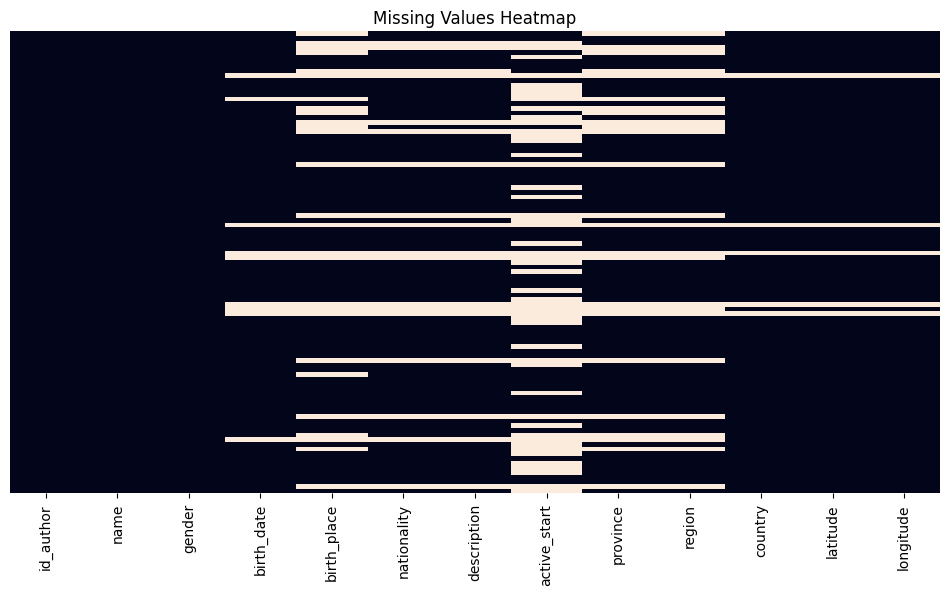

In [36]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_cleaned.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [37]:
df_cleaned

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,province,region,country,latitude,longitude
0,ART82291002,99 posse,M,1991-10-09,NaN,Italia,gruppo musicale italiano,1991-01-01,NaN,NaN,Italy,42.638426,12.674297
1,ART53496045,achille lauro,M,1990-07-11,Verona,Italia,cantautore e rapper italiano (1990-),2012-01-01,Verona,Veneto,Italy,45.442498,10.985738
2,ART18853907,alfa,M,2000-08-22,NaN,NaN,NaN,NaN,Genova,Liguria,Italy,44.407260,8.933862
3,ART64265460,anna pepe,F,2003-08-15,NaN,NaN,NaN,NaN,NaN,NaN,Italy,42.638426,12.674297
4,ART75741740,articolo 31,M,1990,NaN,Italia,gruppo musicale hip hop italiano,1990-01-01,NaN,NaN,Italy,42.638426,12.674297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,ART98118784,tormento,M,1975-09-06,Reggio Calabria,Italia,"rapper, cantautore e beatmaker italiano (1975-)",NaN,Reggio Calabria,Calabria,Italy,38.103539,15.639756
95,ART15560128,vacca,M,1979-10-21,Cagliari,Italia,rapper italiano,2001-01-01,Cagliari,Sardegna,Italy,39.217199,9.113311
96,ART57587384,willie peyote,M,1985-08-28,Torino,Italia,rapper e cantautore italiano (1985-),2004-01-01,Torino,Piemonte,Italy,45.067755,7.682489
97,ART71515715,yeиdry,F,1993-07-27,NaN,NaN,NaN,NaN,NaN,NaN,Italy,42.638426,12.674297


In [38]:
df_cleaned.country.value_counts()

country
Italy             91
Japan              1
United Kingdom     1
Canada             1
Name: count, dtype: int64

In [39]:
def extract_year(value):
    if pd.isna(value):
        return np.nan
    
    value = str(value).strip()
    
    if len(value) >= 4 and value[:4].isdigit():
        return value[:4]
    
    return np.nan

df_cleaned["birth_year"] = df_cleaned["birth_date"].apply(extract_year)
df_cleaned["active_year"] = df_cleaned["active_start"].apply(extract_year)
mask = df_cleaned["birth_year"].notna() & \
       df_cleaned["active_year"].notna() & \
       (df_cleaned["birth_year"] == df_cleaned["active_year"])

df_match = df_cleaned[mask]
df_cleaned = df_cleaned.drop(columns=["birth_year", "active_year"])
df_match[["name", "birth_date", "birth_year", "active_start", "active_year"]]

,name,birth_date,birth_year,active_start,active_year
0,99 posse,1991-10-09,1991,1991-01-01,1991
4,articolo 31,1990,1990,1990-01-01,1990
8,bigmama,2001,2001,2001-01-01,2001
20,dark polo gang,2014,2014,2014-01-01,2014


Maybe these are not solo, they might be group => birth_date = active_start